In [1]:
#Let's import the data through CoinMarketCap API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'df5db821-f557-45ea-8fa6-f80848240f86',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-06T13:51:32.793Z', 'error_code': 0, 'error_message': None, 'elapsed': 47, 'credit_count': 1, 'notice': None, 'total_count': 8860}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9921, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
import pandas as pd

In [3]:
#Converting the data into a dataframe 

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9921,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.925392e+07,1.925392e+07,...,39.6684,3.525973e+11,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
1,1027,Ethereum,ETH,ethereum,6333,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,18.7881,1.528820e+11,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
2,825,Tether,USDT,tether,45831,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627249e+10,7.314177e+10,...,8.1416,7.311672e+10,None,2023-01-06T13:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-06 13:51:40.096560
3,3408,USD Coin,USDC,usd-coin,9423,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.384119e+10,4.384119e+10,...,5.3884,4.384666e+10,None,2023-01-06T13:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-06 13:51:40.096560
4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599637e+08,1.599800e+08,...,5.0514,5.139164e+10,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.056377e+10,9.998917e+10,...,2.0956,3.372399e+10,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
6,4687,Binance USD,BUSD,binance-usd,5954,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.667657e+10,1.667657e+10,...,2.0507,1.668695e+10,None,2023-01-06T13:50:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-06 13:51:40.096560
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,1.1599,9.438025e+09,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
8,2010,Cardano,ADA,cardano,626,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.452191e+10,3.528563e+10,...,1.1517,1.221590e+10,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
9,3890,Polygon,MATIC,polygon,565,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.8385,7.812072e+09,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560


In [4]:
#Automating the process by creating API Runner that imports the data every one minute

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'df5db821-f557-45ea-8fa6-f80848240f86',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    

In [5]:

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed")
    sleep(60)
exit()


API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [6]:
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9921,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.925392e+07,1.925392e+07,...,39.6684,3.525973e+11,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
1,1027,Ethereum,ETH,ethereum,6333,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,18.7881,1.528820e+11,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
2,825,Tether,USDT,tether,45831,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627249e+10,7.314177e+10,...,8.1416,7.311672e+10,None,2023-01-06T13:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-06 13:51:40.096560
3,3408,USD Coin,USDC,usd-coin,9423,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.384119e+10,4.384119e+10,...,5.3884,4.384666e+10,None,2023-01-06T13:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-06 13:51:40.096560
4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599637e+08,1.599800e+08,...,5.0514,5.139164e+10,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,4943,Dai,DAI,multi-collateral-dai,1769,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5.740689e+09,5.740689e+09,...,0.7042,5.739685e+09,None,2023-01-06T13:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-01-06 13:56:51.479338
11,2,Litecoin,LTC,litecoin,867,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.0,7.199288e+07,8.400000e+07,...,0.6578,6.255996e+09,None,2023-01-06T13:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:56:51.479338
12,6636,Polkadot,DOT,polkadot-new,453,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.153272e+09,1.269496e+09,...,0.6548,5.875009e+09,None,2023-01-06T13:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:56:51.479338
13,5426,Solana,SOL,solana,417,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.680626e+08,5.380104e+08,...,0.5872,6.996014e+09,None,2023-01-06T13:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:56:51.479338


In [7]:
#Let's make the float format a bit nicer looking

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9921,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19253918.00000,19253918.00000,NaN,1,NaN,NaN,None,2023-01-06T13:50:00.000Z,16790.34841,14988421150.41686,-4.87130,0.32255,-0.10612,1.89815,-0.37371,-18.99153,-13.88347,323279991451.38666,39.66840,352597316581.44000,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
1,1027,Ethereum,ETH,ethereum,6333,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-01-06T13:50:00.000Z,1249.30229,4070399390.67118,-20.02270,0.44608,-0.10044,4.89256,1.36817,-20.86423,-5.83634,152881951801.02856,18.78810,152881951801.03000,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
2,825,Tether,USDT,tether,45831,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66272490385.72939,73141766321.23428,NaN,3,NaN,NaN,None,2023-01-06T13:50:00.000Z,0.99966,20342132132.34560,-6.67490,-0.00334,-0.01620,-0.00314,-0.04181,-0.04063,-0.04603,66249798919.54020,8.14160,73116722839.27000,None,2023-01-06T13:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-06 13:51:40.096560
3,3408,USD Coin,USDC,usd-coin,9423,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43841190313.79315,43841190313.79315,NaN,4,NaN,NaN,None,2023-01-06T13:50:00.000Z,1.00012,2061483588.24438,-9.30360,0.00650,0.02356,0.00660,0.00249,0.01485,0.01861,43846661197.75136,5.38840,43846661197.75000,None,2023-01-06T13:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-06 13:51:40.096560
4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159963742.99818,159979963.59043,NaN,5,NaN,NaN,None,2023-01-06T13:50:00.000Z,256.95819,381703849.46046,-16.56810,0.55859,0.20370,5.47355,-9.59896,-22.02331,-8.49315,41103993350.70969,5.05140,51391637355.20000,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50563767827.00000,99989171756.00000,NaN,6,NaN,NaN,None,2023-01-06T13:50:00.000Z,0.33724,710300171.10460,-4.67180,0.58028,-0.94450,-0.52359,-11.68223,-29.06170,-34.93776,17052121422.70805,2.09560,33723992802.61000,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096560
6,4687,Binance USD,BUSD,binance-usd,5954,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16676570356.60406,16676570356.60406,NaN,7,NaN,NaN,None,2023-01-06T13:50:00.000Z,1.00062,4707683323.37305,-8.64700,0.02385,0.06821,0.06277,0.05214,0.12483,0.07755,16686948754.18386,2.05070,16686948754.18000,None,2023-01-06T13:50:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-01-06 13:51:40.096560
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2023-01-06T13:50:00.000Z,0.07114,317792205.02025,-26.36940,0.82766,-2.30524,4.97441,-26.02741,-38.95707,14.24445,9438025166.71503,1.15990,9438025166.72000,None,2023-01-06T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-06 13:51:40.096

In [9]:
#Let's group certain change in time (average) by crypto names

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.27940,-0.13733,1.87040,-0.40649,-19.01059,-13.90854
Ethereum,0.41782,-0.10404,4.87915,1.37100,-20.85886,-5.83604
Tether,-0.00318,-0.01626,-0.00276,-0.04098,-0.04024,-0.04527
USD Coin,0.00778,0.01630,0.00436,0.00051,0.00814,0.01593
BNB,0.49523,0.18401,5.43338,-9.62252,-21.98848,-8.52014
XRP,0.56049,-0.98425,-0.56498,-11.70710,-29.05663,-34.93616
Binance USD,0.03177,0.03981,0.03842,0.04350,0.05163,0.05602
Dogecoin,0.68599,-2.37691,4.90609,-26.08245,-38.96639,14.15362
Cardano,0.72367,1.96535,12.37592,-12.86977,-33.60006,-36.15677


In [10]:
#Pivoting the results

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.27940
             quote.USD.percent_change_24h    -0.13733
             quote.USD.percent_change_7d      1.87040
             quote.USD.percent_change_30d    -0.40649
             quote.USD.percent_change_60d   -19.01059
             quote.USD.percent_change_90d   -13.90854
Ethereum     quote.USD.percent_change_1h      0.41782
             quote.USD.percent_change_24h    -0.10404
             quote.USD.percent_change_7d      4.87915
             quote.USD.percent_change_30d     1.37100
             quote.USD.percent_change_60d   -20.85886
             quote.USD.percent_change_90d    -5.83604
Tether       quote.USD.percent_change_1h     -0.00318
             quote.USD.percent_change_24h    -0.01626
             quote.USD.percent_change_7d     -0.00276
             quote.USD.percent_change_30d    -0.04098
             quote.USD.percent_change_60d    -0.04024
             quote.USD.percent_change_90

In [11]:
#Converting the created series back to a dataframe

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.27940
            quote.USD.percent_change_24h  -0.13733
            quote.USD.percent_change_7d    1.87040
            quote.USD.percent_change_30d  -0.40649
            quote.USD.percent_change_60d -19.01059
            quote.USD.percent_change_90d -13.90854
Ethereum    quote.USD.percent_change_1h    0.41782
            quote.USD.percent_change_24h  -0.10404
            quote.USD.percent_change_7d    4.87915
            quote.USD.percent_change_30d   1.37100
            quote.USD.percent_change_60d -20.85886
            quote.USD.percent_change_90d  -5.83604
Tether      quote.USD.percent_change_1h   -0.00318
            quote.USD.percent_change_24h  -0.01626
            quote.USD.percent_change_7d   -0.00276
            quote.USD.percent_change_30d  -0.04098
            quote.USD.percent_change_60d  -0.04024
            quote.USD.percent_change_90d  -0.04527
USD Coin    quote.USD.percent_change_1h    0.00778
            quote.USD.percent_change_24h   0.01630
            quote.USD.percent_change_7d    0.00436
            quote.USD.percent_change_30d   0.00051
            quote.USD.percent_change_60d   0.00814
            quote.USD.percent_change_90d   0.01593
BNB         quote.USD.percent_change_1h    0.49523
            quote.USD.percent_change_24h   0.18401
            quote.USD.percent_change_7d    5.43338
            quote.USD.percent_change_30d  -9.62252
            quote.USD.percent_change_60d -21.98848
            quote.USD.percent_change_90d  -8.52014
XRP         quote.USD.percent_change_1h    0.56049
            quote.USD.percent_change_24h  -0.98425
            quote.USD.percent_change_7d   -0.56498
            quote.USD.percent_change_30d -11.70710
            quote.USD.percent_change_60d -29.05663
            quote.USD.percent_change_90d -34.93616
Binance USD quote.USD.percent_change_1h    0.03177
            quote.USD.percent_change_24h   0.03981
            quote.USD.percent_change_7d    0.03842
            quote.USD.percent_change_30d   0.04350
            quote.USD.percent_change_60d   0.05163
            quote.USD.percent_change_90d   0.05602
Dogecoin    quote.USD.percent_change_1h    0.68599
            quote.USD.percent_change_24h  -2.37691
            quote.USD.percent_change_7d    4.90609
            quote.USD.percent_change_30d -26.08245
            quote.USD.percent_change_60d -38.96639
            quote.USD.percent_change_90d  14.15362
Cardano     quote.USD.percent_change_1h    0.72367
            quote.USD.percent_change_24h   1.96535
            quote.USD.percent_change_7d   12.37592
            quote.USD.percent_change_30d -12.86977
            quote.USD.percent_change_60d -33.60006
            quote.USD.percent_change_90d -36.15677
Polygon     quote.USD.percent_change_1h    0.55075
            quote.USD.percent_change_24h  -1.93005
            quote.USD.percent_change_7d    3.35141
            quote.USD.percent_change_30d -11.86405
            quote.USD.percent_change_60d -34.58420
            quote.USD.percent_change_90d  -4.44341
Dai         quote.USD.percent_change_1h    0.03883
            quote.USD.percent_change_24h   0.01527
            quote.USD.percent_change_7d    0.03108
            quote.USD.percent_change_30d   0.02726
            quote.USD.percent_change_60d  -0.01974
            quote.USD.percent_change_90d   0.01626
Litecoin    quote.USD.percent_change_1h    1.02297
            quote.USD.percent_change_24h   0.10153
            quote.USD.percent_change_7d   11.81251
            quote.USD.percent_change_30d  -2.80181
            quote.USD.percent_change_60d   8.08158
            quote.USD.percent_change_90d  39.87278
Polkadot    quote.USD.percent_change_1h    0.84746
            quote.USD.percent_change_24h   1.43007
            quote.USD.percent_change_7d    8.44742
            quote.USD.percent_change_30d -13.10459
            quote.USD.percent_change_60d -33.04967
            quo

In [12]:
df5.count()

values    90
dtype: int64

In [13]:
#Let's add indexes

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27940
1,Bitcoin,quote.USD.percent_change_24h,-0.13733
2,Bitcoin,quote.USD.percent_change_7d,1.87040
3,Bitcoin,quote.USD.percent_change_30d,-0.40649
4,Bitcoin,quote.USD.percent_change_60d,-19.01059
5,Bitcoin,quote.USD.percent_change_90d,-13.90854
6,Ethereum,quote.USD.percent_change_1h,0.41782
7,Ethereum,quote.USD.percent_change_24h,-0.10404
8,Ethereum,quote.USD.percent_change_7d,4.87915
9,Ethereum,quote.USD.percent_change_30d,1.37100


In [14]:
#Renaming the value column

df7= df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27940
1,Bitcoin,quote.USD.percent_change_24h,-0.13733
2,Bitcoin,quote.USD.percent_change_7d,1.87040
3,Bitcoin,quote.USD.percent_change_30d,-0.40649
4,Bitcoin,quote.USD.percent_change_60d,-19.01059
5,Bitcoin,quote.USD.percent_change_90d,-13.90854
6,Ethereum,quote.USD.percent_change_1h,0.41782
7,Ethereum,quote.USD.percent_change_24h,-0.10404
8,Ethereum,quote.USD.percent_change_7d,4.87915
9,Ethereum,quote.USD.percent_change_30d,1.37100


In [15]:
#Renaming the percent_change column values for visualizations

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.27940
1,Bitcoin,24h,-0.13733
2,Bitcoin,7d,1.87040
3,Bitcoin,30d,-0.40649
4,Bitcoin,60d,-19.01059
5,Bitcoin,90d,-13.90854
6,Ethereum,1h,0.41782
7,Ethereum,24h,-0.10404
8,Ethereum,7d,4.87915
9,Ethereum,30d,1.37100


In [16]:
#Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

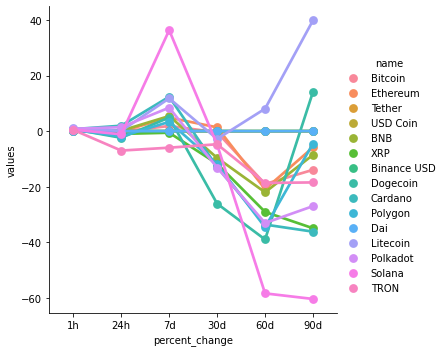

In [17]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
index = pd.Index(range(7))
df10 = df10.reset_index()
df10

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,16790.34841,2023-01-06 13:51:40.096560
1,0,Bitcoin,16790.34841,2023-01-06 13:51:49.147625
2,0,Bitcoin,16787.48575,2023-01-06 13:52:49.461029
3,0,Bitcoin,16780.20348,2023-01-06 13:53:50.082498
4,0,Bitcoin,16781.72546,2023-01-06 13:54:50.462268
5,0,Bitcoin,16783.03627,2023-01-06 13:55:51.121007
6,0,Bitcoin,16780.99473,2023-01-06 13:56:51.479338


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

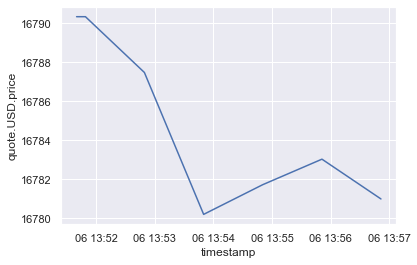

In [24]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)